### Week 3: Naïve Bayes and Bayesian Network
###### Joel Konitzer
###### 9/10/2022

In [24]:
sent = 0.42
sent_guilty = 0.38
nsent_guilty = 0.5

print('a) 1 - 0.42: {:.3f}'.format(1 - sent))
nsent_complement = 1 - sent
print('b) (0.5)(0.58)/(0.5 * 0.58) + (0.38 * 0.42): {:.3f}'.format((nsent_guilty * nsent_complement) / (nsent_guilty * nsent_complement + sent_guilty * sent)))
print('c) 1 - 0.42: {:.3f}'.format(1 - nsent_complement))
print('d) (0.38)(0.42)/(0.38 * 0.42) + (0.50 * 0.58): {:.3f}'.format((sent_guilty * sent) / (sent_guilty * sent + nsent_guilty * nsent_complement)))

a) 1 - 0.42: 0.580
b) (0.5)(0.58)/(0.5 * 0.58) + (0.38 * 0.42): 0.645
c) 1 - 0.42: 0.420
d) (0.38)(0.42)/(0.38 * 0.42) + (0.50 * 0.58): 0.355


2. Given the following table:

|Customer ID| Gender  |Car Type|Shirt Size |Class|
|:---------:|:-------:|:------:|:---------:|:---:|
|1          |M        |Family  |Small      |CO   |
|2          |M        |Sports  |Medium     |CO   |
|3          |M        |Sports  |Medium     |CO   |
|4          |M        |Sports  |Large      |CO   |
|5          |M        |Sports  |Extra Large|CO   |
|6          |M        |Sports  |Extra Large|CO   |
|7          |F        |Sports  |Small      |CO   |
|8          |F        |Sports  |Small      |CO   |
|9          |F        |Sports  |Medium     |CO   |
|10         |F        |Luxury  |Large      |CO   |
|11         |M        |Family  |Large      |C1   |
|12         |M        |Family  |Extra Large|C1   |
|13         |M        |Family  |Medium     |C1   |
|14         |M        |Luxury  |Extra Large|C1   |
|15         |F        |Luxury  |Small      |C1   |
|16         |F        |Luxury  |Small      |C1   |
|17         |F        |Luxury  |Medium     |C1   |
|18         |F        |Luxury  |Medium     |C1   |
|19         |F        |Luxury  |Medium     |C1   |
|20         |F        |Luxury  |Large      |C1   |
<br>

&emsp;a) What is the value of each of the following probabilities?<br>
&emsp;   - P(Gender=M | Class=C0)<br>
&emsp;   - P(Gender=F | Class=C1)<br>
&emsp;   - P(Car Type=Family | Class=C0)<br>
&emsp;   - P(Car Type=Family | Class=C1)<br>
&emsp;   - P(Shirt Size=Medium | Class=C0)<br>
&emsp;   - P(Shirt Size=Medium | Class=C1)<br>
<br>
&emsp;b) Use Naive Bayes Classifier to find the class of P(Gender=F | Car Type=Family| Shirt Size=Medium)

In [28]:
print('a)')
print('P(Gender=M | Class=C0): ', ((6/20)/(10/20)))
print('P(Gender=F | Class=C1): ', ((6/20)/(10/20)))
print('P(Car Type=Family | Class=C0): ', ((1/20)/(10/20)))
print('P(Car Type=Family | Class=C1): ', ((3/20)/(10/20)))
print('P(Shirt Size=Medium | Class=C0): ', ((6/20)/(10/20)))
print('P(Shirt Size=Medium | Class=C1): ', ((4/20)/(10/20)))

print('b)')
print('P(Gender=F | Car Type=Family| Shirt Size=Medium) for C0: {:.3f}'.format( (4/10) * 0.1 * (3/10)))
#P(X|C0) = P(Gender=F and Class=C0)/P(Class=C0) * 0.10 * 0.30
#P(X|C0) = 0.40 * 0.10 * 0.30
#P(X|C0) = 0.012
#P(X|C0) = 1.2%
print('P(Gender=F | Car Type=Family| Shirt Size=Medium) for C1: ', (6/10) * (3/10) * (4/10))   
print('**The class would be C1 since it has a higher probability**')
#https://www.javatpoint.com/machine-learning-naive-bayes-classifier

a)
P(Gender=M | Class=C0):  0.6
P(Gender=F | Class=C1):  0.6
P(Car Type=Family | Class=C0):  0.1
P(Car Type=Family | Class=C1):  0.3
P(Shirt Size=Medium | Class=C0):  0.6
P(Shirt Size=Medium | Class=C1):  0.4
b)
P(Gender=F | Car Type=Family| Shirt Size=Medium) for C0: 0.012
P(Gender=F | Car Type=Family| Shirt Size=Medium) for C1:  0.072
**The class would be C1 since it has a higher probability**


Source for corrections: https://colab.research.google.com/drive/155fDt7d9H7D3KrlE6uS4_PtMh0yvPRV3?usp=sharing#scrollTo=KZcJuJDEFM85

### Project

In [32]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import string
import nltk

%matplotlib inline

from nltk import FreqDist
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Import libraries for predcton
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,auc,f1_score

from wordcloud import WordCloud

import TextFunctions

In [2]:
#Load spam dataset
df = pd.read_csv('spam.csv', encoding= 'latin-1', sep=',')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
#Only two columns are important for this analysis, I'll drop the others and rename the two
df = df.rename(columns={'v1': 'class', 'v2': 'text'}).copy()

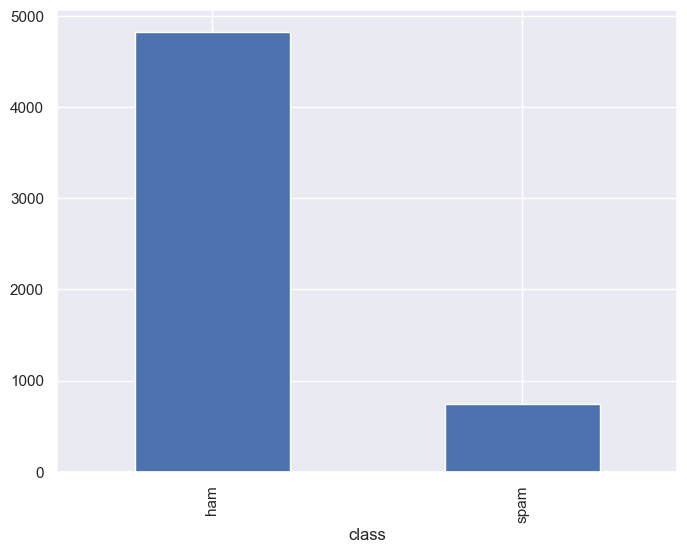

In [69]:
#View value distribution
plot=plt.figure(figsize=(8,6))
df.groupby('class').text.count().plot.bar(ylim=0)
plt.show()

In [70]:
#Retain class and text columns
cols = ['class', 'text']
df = df[cols].copy()

In [71]:
df

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [72]:
#Clean and transform the text column - functions are locatd in TextFunction.py
add_stopw = ['and']
df = TextFunctions.supportngcols(df,add_stopw)
df = TextFunctions.transformtext(df,add_stopw)

C:\Users\jwkon\Desktop\School\Regis\MSDS680 - Machine Learning\Week 3\TextFunctions.py:35: FutureWarning: The default value of regex will change from True to False in a future version.
  text = text.str.replace('\S+@\S+','') #looking for the case of XXXX@XXXX
C:\Users\jwkon\Desktop\School\Regis\MSDS680 - Machine Learning\Week 3\TextFunctions.py:36: FutureWarning: The default value of regex will change from True to False in a future version.
  text = text.str.replace('http\S+','') #looking for http or https web addresses
C:\Users\jwkon\Desktop\School\Regis\MSDS680 - Machine Learning\Week 3\TextFunctions.py:37: FutureWarning: The default value of regex will change from True to False in a future version.
  text = text.str.replace('\S+.com','') #looking for email addresses that end in '.com'
C:\Users\jwkon\Desktop\School\Regis\MSDS680 - Machine Learning\Week 3\TextFunctions.py:38: FutureWarning: The default value of regex will change from True to False in a future version.
  text = text.st

In [73]:
df.head()
#pass clean text from text_clean column to textFeatures
textFeatures = df['text_clean'].copy()

,class,text,word_cnt,char_cnt,stopwords,text_clean
0,ham,"Go until jurong point, crazy.. Available only ...",20,111,4,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,6,29,0,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,155,5,free entri p win fa cup final tkts st may text...
3,ham,U dun say so early hor... U c already then say...,11,49,2,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,61,5,nah dont think goe usf live around though


In [75]:
#create TfidVectorizer to create the numerical values
vectorizer = TfidfVectorizer(stop_words="english",decode_error='ignore', lowercase = True, min_df=2)

#numericalize the textFeatures
features = vectorizer.fit_transform(textFeatures.values.astype('U'))

#create the test and train datasets
features_train, features_test, labels_train, labels_test = train_test_split(features, df['class'], test_size=0.2, random_state=111)

In [76]:
#View set split
print('Train size: ', features_train.shape)
print('Test size: ', features_test.shape)

Train size:  (4457, 3135)
Test size:  (1115, 3135)


In [89]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

#Check accuracy of model on cleaned text
mnb = MultinomialNB(alpha=0.2)
mnb.fit(features_train, labels_train)
prediction = mnb.predict(features_test)
print('Accuracy of Model: ', accuracy_score(labels_test,prediction))

Accuracy of Model:  0.9883408071748879


In [90]:
# Create the confusion matrix
def plot_confusion_matrix(y_test, preds):
    ''' Plot the confusion matrix for the target labels and predictions '''
    cm = confusion_matrix(y_test, preds)

    # Create a dataframe with the confussion matrix values
    confusion_m = pd.DataFrame(cm, columns=['Predicted: Ham', 'Predicted: Spam'], 
                               index=['Actual: Ham', 'Actual: Spam'])
    plt.figure(figsize = (5,5))
    # Plot the confusion matrix
    sns.set(font_scale=1.4) #for label size
    sns.heatmap(confusion_m, annot=True,fmt='.0f')
    plt.show()

              precision    recall  f1-score   support

         ham     0.9897    0.9969    0.9933       967
        spam     0.9787    0.9324    0.9550       148

    accuracy                         0.9883      1115
   macro avg     0.9842    0.9647    0.9742      1115
weighted avg     0.9883    0.9883    0.9882      1115



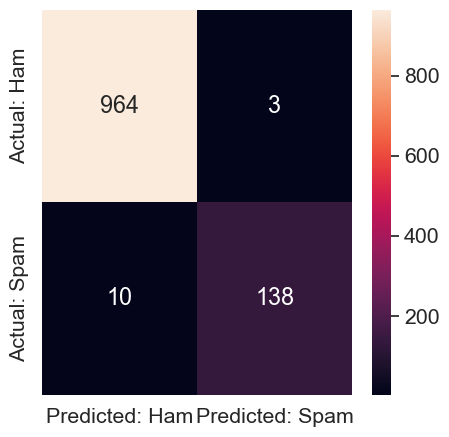

In [91]:
# Predicting the Test set results
preds = prediction

print(metrics.classification_report(labels_test, preds,  digits=4))
plot_confusion_matrix(labels_test, preds)

In [92]:
#Unpivot dataframe so that each feature representes a single column and data values are represented as binary
feature_names = vectorizer.get_feature_names()
dense = features.todense()
denselist = dense.tolist()
df_test = pd.DataFrame(denselist, columns=feature_names)

C:\Users\jwkon\miniconda3\envs\ms680\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [103]:
df_test.head()

,____,aah,aathilov,aathiwher,abi,abil,abiola,abj,abl,abt,...,åmorefrmmob,åmsg,åperwksub,åwk,åð,ì_,ì_ll,ìï,û_,ûò
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
#View feature frequency
print(vectorizer.vocabulary_)

{'point': 2009, 'crazi': 571, 'avail': 179, 'bugi': 353, 'great': 1100, 'world': 3033, 'la': 1440, 'buffet': 352, 'cine': 483, 'got': 1085, 'wat': 2947, 'ok': 1862, 'lar': 1453, 'joke': 1375, 'wif': 2993, 'oni': 1873, 'free': 977, 'entri': 821, 'win': 2999, 'fa': 880, 'cup': 590, 'final': 926, 'tkts': 2726, 'st': 2514, 'text': 2671, 'receiv': 2163, 'questionstd': 2117, 'txt': 2810, 'ratetc': 2141, 'appli': 127, 'dun': 765, 'say': 2294, 'earli': 770, 'hor': 1214, 'alreadi': 87, 'nah': 1766, 'dont': 733, 'think': 2693, 'goe': 1068, 'usf': 2874, 'live': 1512, 'freemsg': 981, 'hey': 1178, 'darl': 614, 'week': 2965, 'word': 3029, 'id': 1257, 'like': 1497, 'fun': 1001, 'tb': 2638, 'xxx': 3079, 'std': 2530, 'send': 2329, 'rcv': 2143, 'brother': 335, 'speak': 2489, 'treat': 2782, 'aid': 63, 'request': 2203, 'mell': 1648, 'oru': 1894, 'minnaminungint': 1679, 'nurungu': 1838, 'vettam': 2897, 'set': 2341, 'callertun': 385, 'caller': 384, 'press': 2056, 'copi': 547, 'friend': 989, 'winner': 3004, 

In [96]:
# visualize the data on a WordCloud
def visualize(label):
    words = ''
    for msg in df[df['class'] == label]['text']:
        msg = msg.lower()
        words += msg + ' '
    wordcloud = WordCloud(width=600, height=600).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

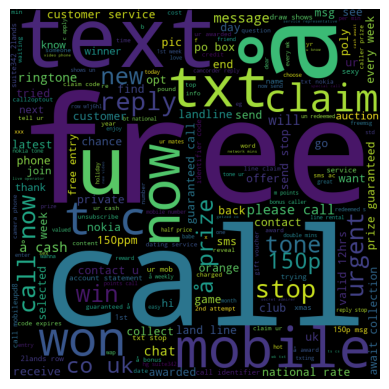

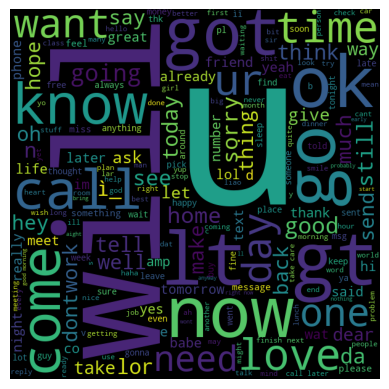

In [98]:
#Visualize features assocaited with the class 'spam'
visualize('spam')
#Visualize features assocaited with the class 'spam'
visualize('ham')

In [99]:
#Find the most frequently occuring words that are most meaningful from out text corpus
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=False)
    
    #get the feature names and tf-idf score of top n items
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]

    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])

    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

In [100]:
#Get the most important features
feature_names = vectorizer.get_feature_names()
sorted_items=sort_coo(features.tocoo())
sorted_items

#Select top n from important feature list
keywords=extract_topn_from_vector(feature_names,sorted_items,5)

C:\Users\jwkon\miniconda3\envs\ms680\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [102]:
#Top 5 features
keywords

{'good': 0.049, 'need': 0.053, 'new': 0.055, 'night': 0.057, 'friend': 0.06}

Although the concepts demonstrated in this project are simple, in mathematical terms, they allow important insights and better understandings to emerge from the data being analyzed. This project aimed to classify text into spam or ham and then view the words that contribute the most to model performance. The column of interest, ‘text,’ contained raw data that was cleaned of punctuation, stemmed to root words, and renamed to ‘text_clean.’ An accuracy of 0.988 was achieved, indicating the model can sufficiently identify if the text is spam. The confusing matrix shows that actual spam was incorrectly predicted more than actual ham, which may want to be reversed depending on the use case. In practice, misclassifying spam as not spam could cause more damage to end users because malicious payloads can sometimes accompany spam emails. The word cloud visual for spam showed words typically associated with spam emails or messages (free, class, won, claim), while the ham column did not contain any of those words. Lastly, the top words the model deemed necessary in classification, based on the tf-idf score, were common words typically found in introductory conversations. It could be assumed that the spam classification model heavily depends on phrases or text containing those keywords to achieve the high accuracy it did in this exercise.  

##### Naive Bayes classifier in machine learning - javatpoint. www.javatpoint.com. (n.d.). Retrieved September 12, 2022, from https://www.javatpoint.com/machine-learning-naive-bayes-classifier 

 